In [11]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
from util import *
import solver as solver

In [26]:
# setup domain ---
res = 160
size = 1.0
numIterations = 1
domain = Domain2D(size, res)


def solve_diffusion_2d( domain, numIterations, D, Q, phi_boundary, D_boundary = None  ):
    # setup/reset grids ---
    phi = np.zeros((domain.res, domain.res)) # scalar field for which we want to solve 
    if D_boundary is None:
        D_boundary = np.zeros((domain.res, domain.res)) # D boundary values for dirichlet boundary condition 
        
    # solve ---
    for step in range(numIterations):
        # call inner loop in c++
        solver.iterate_2d_diffusion(phi, D, Q, phi_boundary, D_boundary, domain.h, True)
        
    return phi

In [23]:
# initialize emission field ---
Q = np.zeros((domain.res, domain.res))
pointlight1_center_ls = np.array([0.5, 0.5])
pointlight1_center_ws = domain.localToWorld(pointlight1_center_ls)
pointlight1_voxel = domain.voxelToIndex(domain.localToVoxel(pointlight1_center_ls))
Q[ pointlight1_voxel[0], pointlight1_voxel[1] ] = 1.0/(domain.h*domain.h)

D = np.full((domain.res, domain.res), 1.0)

# boundary values ---
phi_boundary = np.zeros((domain.res, domain.res)) # phi boundary values for dirichlet boundary condition
D_boundary = np.zeros((domain.res, domain.res)) # D boundary values for dirichlet boundary condition 

# solve ---
phi = solve_diffusion_2d( domain, numIterations, Q, phi_boundary, D_boundary)

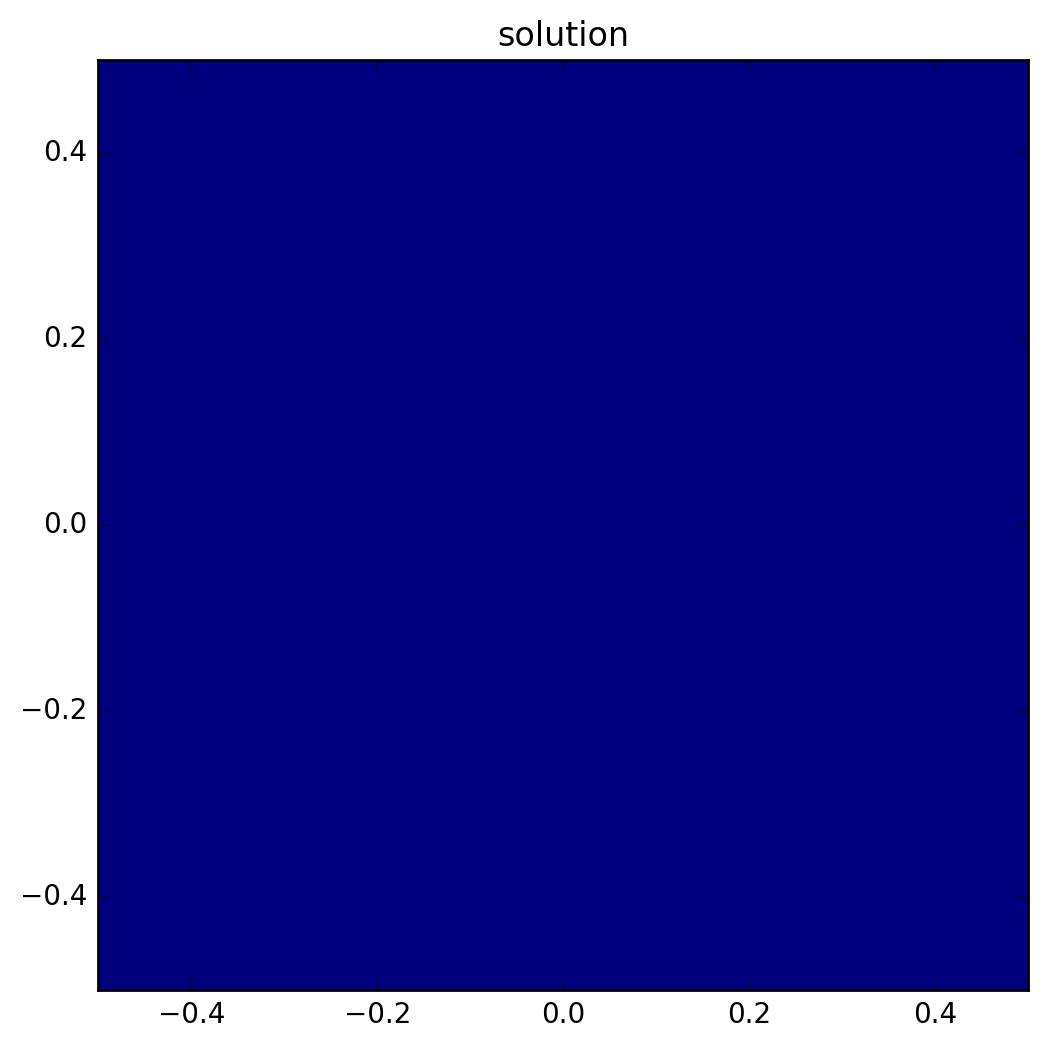

In [24]:
fig = plt.figure(figsize=(6, 6))

#plt.subplot(221)
plt.title('solution')
plt.imshow(phi, interpolation="nearest", extent = [domain.bound_min[0], domain.bound_max[0], domain.bound_min[1], domain.bound_max[1]])
plt.show()